In [1]:
import numpy as np

In [1]:
estimates_s = np.arange(0,60000000, 10000)

# weight factors
ov = 1.25
ov_b = 2
uv_b = 1.5

# risk factor range
risks_s = np.arange(0.5, 1.6, 0.25)

# cutom loss fucntion including risk factors
def volume_lossR(estimate_s, true_s, risk_s):
        true_s = np.array(true_s).astype(float)
        loss_s = np.zeros_like(true_s)
        underest = (estimate_s < true_s) 
        underest_bad = (estimate_s == 0) & (true_s > 0)
        overest = (estimate_s > true_s) 
        overest_bad = (estimate_s > 0) & (true_s == 0)
        loss_s[underest] = (true_s[underest] - estimate_s)
        loss_s[underest_bad] = (true_s[underest_bad] - estimate_s)*(uv_b*(risk_s**-0.5))
        loss_s[overest] = (estimate_s - true_s[overest])*(ov*risk_s)
        loss_s[overest_bad] = np.abs((true_s[overest_bad]-estimate_s))*(ov_b*risk_s)
        return np.square(loss_s)

NameError: name 'np' is not defined

In [ ]:
volume_lossR(2.5,np.arange(0,6,1),1)

In [ ]:
volume_lossR(2,np.arange(0,6,1),1).mean()

In [ ]:
volume_lossR(2,4,1)

In [ ]:
np.square(2)

In [ ]:
import sys
sys.path.insert(0, '/home/bl9/gempy')
import gempy as gp

In [2]:
import numpy as np
import sys
sys.path.insert(0, '/home/bl9/gempy')
import gempy as gp
import decision_making as dm
import scipy.optimize as sop
%matplotlib inline

/home/bl9/gempy/gempy/plotting/visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')
/home/bl9/gempy/gempy/data_management.py:35: UserWarning: qgrid package is not installed. No interactive dataframes available.
  warnings.warn('qgrid package is not installed. No interactive dataframes available.')


In [3]:
from IPython.core.pylabtools import figsize
figsize(15, 6)
from matplotlib import pyplot as plt

In [4]:
dm.expected_loss_for_estimate(estimate_s=3, true_s=np.arange(0,10,1))

2.7000000000000002

In [5]:
risk_range=np.arange(0.5,1.75,0.25)

In [6]:
from numpy.random import randint
random1 = randint(500,1000,500)
random2 = randint(-100,100,500)
random_numbers = np.append(random1,random2)
score = np.random.normal(200, 500, 1000)

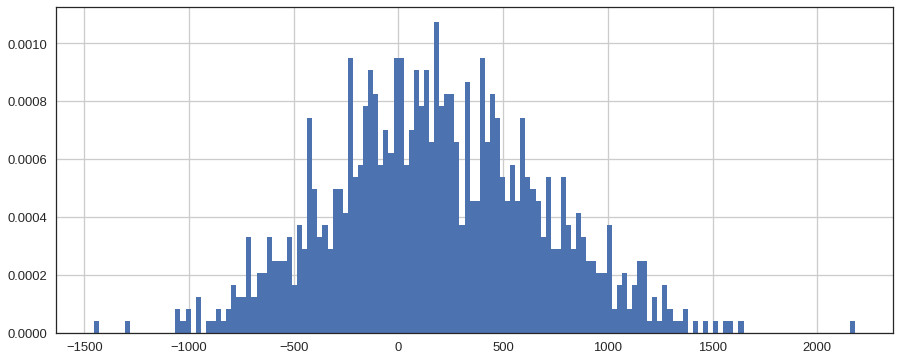

In [7]:
_hist = plt.hist(score, bins=150, normed=True, histtype="stepfilled")
plt.grid()

Bayes action (minimum) at risk r 0.50: 381.64 --- expected loss: 406.74
Bayes action (minimum) at risk r 0.75: 171.28 --- expected loss: 455.67
Bayes action (minimum) at risk r 1.00: 38.75 --- expected loss: 479.64
Bayes action (minimum) at risk r 1.25: -64.88 --- expected loss: 490.09
Bayes action (minimum) at risk r 1.50: -136.45 --- expected loss: 493.22


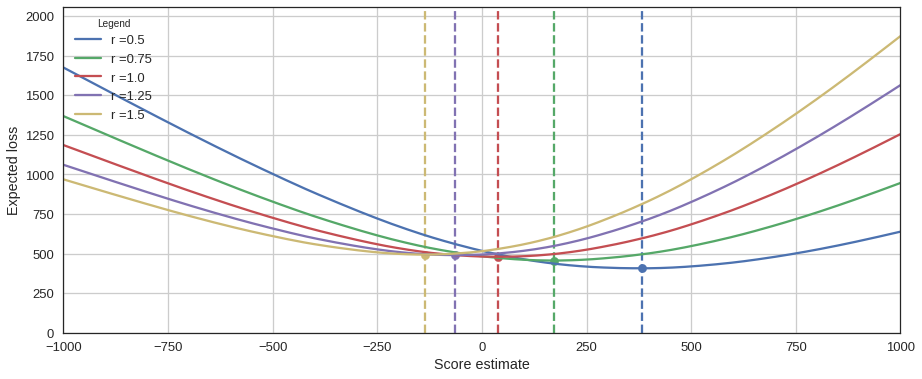

In [10]:
dm.expected_loss_plot(estimate_range=np.arange(-1000,1000,1), true_s=score, risk_range=risk_range,
                       function='absolute', u=1,o=1.5,verbose=True)